
COSC2671 Social Media and Network Analytics

Workshop 3

Jeffrey Chan, RMIT University, 2022


The following function is a helper one, it does tokenisation removing stopwords and stemming.

In [2]:
def processTweet(text, tokenizer, stemmer, stopwords):
    """
    Perform tokenisation, normalisation (lower case and stemming) and stopword and twitter keyword removal.

    @param text: tweet text
    @param tokenizer: tokeniser used.
    @param stemmer: stemmer used.
    @param stopwords: list of stopwords used

    @returns: a list of processed tokens
    """

    # covert all to lower case
    text = text.lower()
    # tokenise
    lTokens = tokenizer.tokenize(text)
    # strip whitespaces before and after
    lTokens = [token.strip() for token in lTokens]
    # stem (we use set to remove duplicates)
    lStemmedTokens = set([stemmer.stem(tok) for tok in lTokens])



    # remove stopwords, digits
    return [tok for tok in lStemmedTokens if tok not in stopwords and not tok.isdigit()]

The following is the main part of the Notebook.  It setups, loads from the json file and calls processTweet().  Then it update the count of the terms.

In [10]:
import sys
import json
import string
from collections import Counter
import nltk
nltk.download('stopwords')


# load json file
# note usually we would do some checks, but for clarify's sake we haven't implement that code here
fJsonName = 'rmitCsTwitterTimeline.json'

# number of most frequent terms to display
freqNum = 50

# tweet tokeniser to use
tweetTokeniser = nltk.tokenize.TweetTokenizer()
# use the punctuation symbols defined in string.punctuation
lPunct = list(string.punctuation)
# use stopwords from nltk and a few other twitter specific terms like 'rt' (retweet)
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['rt', 'via']
# we use the popular Porter stemmer
tweetStemmer = nltk.stem.PorterStemmer()

# our term frequency counter
termFreqCounter = Counter()


# open json file and process it tweet by tweet
with open(fJsonName, 'r') as f:
    dTweets = json.load(f)
    
    for tweet in dTweets['data']:
        tweetText = tweet.get('text', '')
        # tokenise, filter stopwords and get convert to lower case
        lTokens = processTweet(text=tweetText, tokenizer=tweetTokeniser, stemmer=tweetStemmer, stopwords=lStopwords)

        # remove noisy input
        lTokens = [token for token in lTokens if token != '…']

        # update count
        termFreqCounter.update(lTokens)

# print out most common terms
for term, count in termFreqCounter.most_common(freqNum):
    print(term + ': ' + str(count))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lukas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


@ir_oldi: 25
@damiano10: 19
paper: 14
@rmitcomput: 14
great: 12
thank: 12
@rmit_cidda: 12
@rmit: 11
student: 11
@admscentr: 11
@karinv: 10
mani: 9
#sigir2022: 9
@sigirconf: 9
@flosalim: 8
thi: 8
research: 8
@jtrippa: 8
come: 8
work: 8
accept: 8
talk: 7
wa: 7
@marwah_k: 6
fantast: 6
ai: 6
congratul: 6
thrill: 5
collabor: 5
join: 5
us: 5
question: 5
day: 5
part: 5
w: 5
onlin: 5
present: 5
search: 5
queri: 5
one: 4
ha: 4
i'm: 4
rmit: 4
time: 4
good: 4
adm: 4
symposium: 4
interdisciplinari: 4
@researchrmit: 4
first: 4


C:\Users\lukas\AppData\Local\Temp\ipykernel_3688\1948158442.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


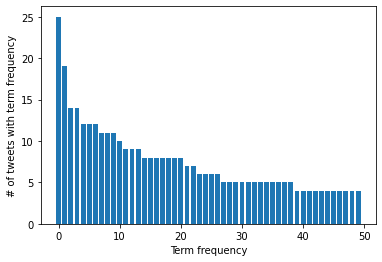

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# assign values
mostCommonTerms = termFreqCounter.most_common(freqNum)
# x = [term for term, _ in mostCommonTerms]
x = [value for value in range(freqNum)]
y = [value for _, value in mostCommonTerms]
ax.bar(x, y)

# set axis names
ax.set_ylabel("# of tweets with term frequency")
ax.set_xlabel("Term frequency")

fig.show()